In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/day.csv', index_col=1, parse_dates=True)

In [25]:
a = df.resample('D')

In [27]:
dfs = a.asfreq()

In [28]:
len(df), len(dfs)

(731, 731)

In [29]:
dY = dfs.iloc[:, -3:]
dX = dfs.iloc[:,1:-3]

<AxesSubplot: xlabel='dteday'>

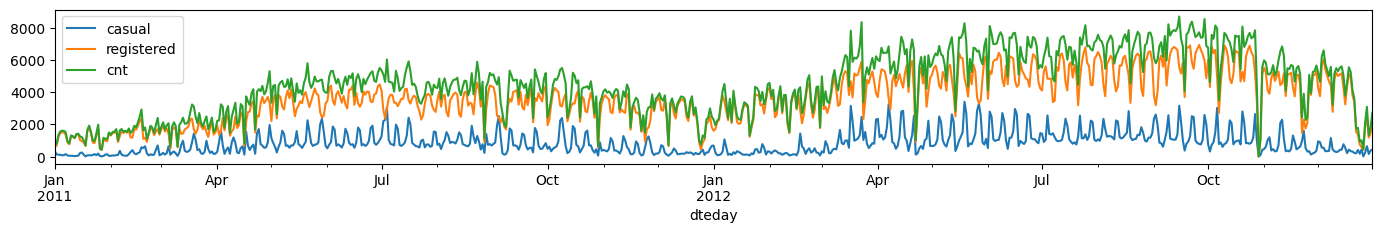

In [30]:
dY.plot(figsize=(17,2))

In [56]:
last_train_index = int(len(dY) * 0.75)

In [63]:
Y_train = dY.iloc[:last_train_index, -1]
Y_test = dY.iloc[last_train_index:, -1]

In [60]:
X_train = dX.iloc[:last_train_index]
X_test = dX.iloc[last_train_index:]

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [64]:
lr = LinearRegression().fit(X_train, Y_train)

In [66]:
lr_p = lr.predict(X_test)

In [137]:
errors = pd.DataFrame(columns=['MAPE', 'RMSE'])
def err(name, y_pred):
    mape = mean_absolute_percentage_error(y_true=Y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=Y_test, y_pred=y_pred, squared=False)
    errors.loc[name, :] = [mape, rmse]

In [138]:
err('LR', lr_p)
errors

,MAPE,RMSE
LR,1.325638,1144.022834


In [81]:
results = pd.DataFrame({'True Values':Y_test})
results

,True Values
dteday,
2012-07-02,6227
2012-07-03,6660
2012-07-04,7403
2012-07-05,6241
2012-07-06,6207
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [82]:
results['LR'] = lr_p
results

,True Values,LR
dteday,,
2012-07-02,6227,7395.662438
2012-07-03,6660,7551.669432
2012-07-04,7403,7262.569679
2012-07-05,6241,7900.003377
2012-07-06,6207,7998.551059
...,...,...
2012-12-27,2114,3151.023834
2012-12-28,3095,3901.785988
2012-12-29,1341,3722.950282


<AxesSubplot: xlabel='dteday'>

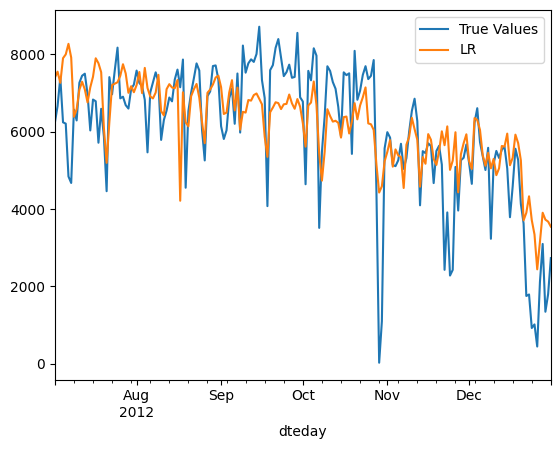

In [83]:
results.plot()

# Forecasting
Where the goal is to predict future values of the input series.

## scikit-learn

In [111]:
cnt = dY.iloc[:, -1]
lag_y = pd.DataFrame({'y0':cnt})
for i in range(1,21):
    lag_y[f'y-{i}'] = cnt.shift(i)
lag_y

,y0,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,...,y-11,y-12,y-13,y-14,y-15,y-16,y-17,y-18,y-19,y-20
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,801,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,1349,801.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,1562,1349.0,801.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1600,1562.0,1349.0,801.0,985.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0,...,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0,5582.0,5008.0
2012-12-28,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,...,4585.0,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0,5582.0
2012-12-29,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,...,5557.0,4585.0,3786.0,5047.0,5611.0,5532.0,5319.0,5501.0,5170.0,3228.0


In [112]:
a = lag_y.corr()['y0']

In [113]:
a

y0      1.000000
y-1     0.848588
y-2     0.784623
y-3     0.753541
y-4     0.745648
y-5     0.753158
y-6     0.769483
y-7     0.756633
y-8     0.746531
y-9     0.732086
y-10    0.729390
y-11    0.718884
y-12    0.717397
y-13    0.718225
y-14    0.738855
y-15    0.734947
y-16    0.713027
y-17    0.707689
y-18    0.697446
y-19    0.696995
y-20    0.708854
Name: y0, dtype: float64

In [124]:
l_train = lag_y.iloc[:last_train_index, 1:]
ly_train = lag_y.iloc[:last_train_index, 0]
l_train.dropna(inplace=True)
ly_train = ly_train.loc[l_train.index]
l_test = lag_y.iloc[last_train_index:, 1:]
ly_test = lag_y.iloc[last_train_index:, 0]

In [125]:
lagmodel = LinearRegression().fit(l_train, ly_train)

In [126]:
y_p_lag = lagmodel.predict(l_test)

In [130]:
results['20day_lag'] = y_p_lag

In [139]:
err('20day_lag', y_p_lag)
errors

,MAPE,RMSE
LR,1.325638,1144.022834
20day_lag,1.690282,1144.391423


<AxesSubplot: xlabel='dteday'>

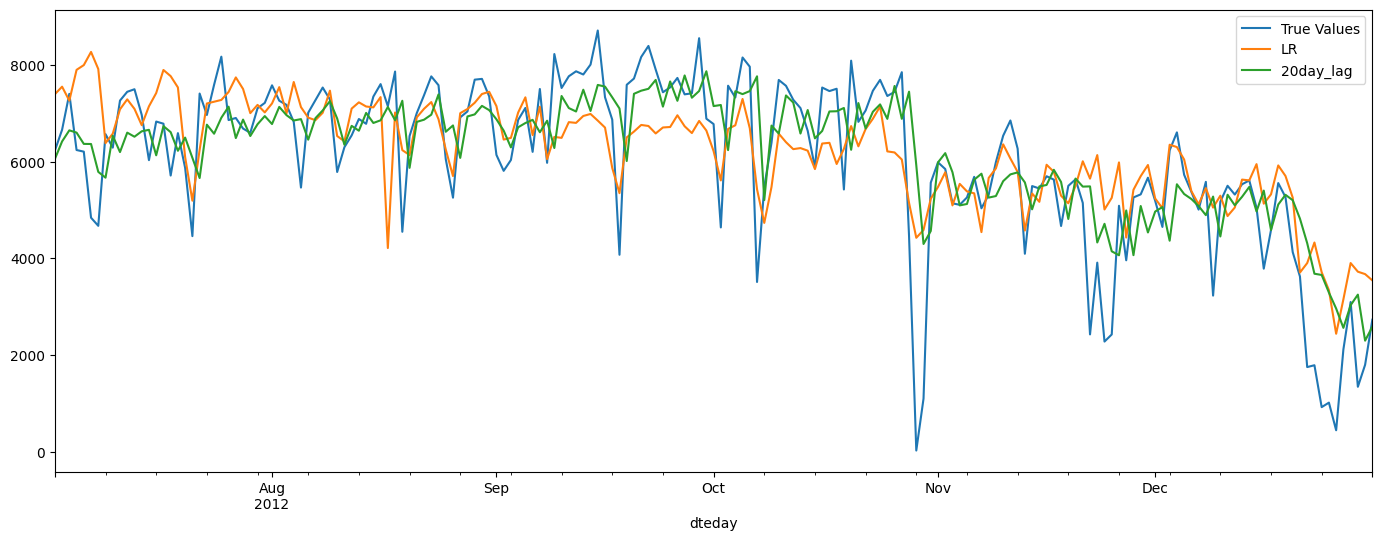

In [132]:
results.plot(figsize=(17,6))

In [145]:
xlag_train = pd.concat([X_train.loc[l_train.index], l_train], axis=1)
xlag_test = pd.concat([X_test.loc[l_test.index], l_test], axis=1)

In [146]:
lagmodel2 = LinearRegression().fit(xlag_train, ly_train)

In [148]:
y_p_lag2 = lagmodel2.predict(xlag_test)

In [149]:
results['20day_lag_with_x'] = y_p_lag2

In [150]:
err('20day_lag_with_x', y_p_lag2)
errors

,MAPE,RMSE
LR,1.325638,1144.022834
20day_lag,1.690282,1144.391423
20day_lag_with_x,1.271495,964.695275


<AxesSubplot: xlabel='dteday'>

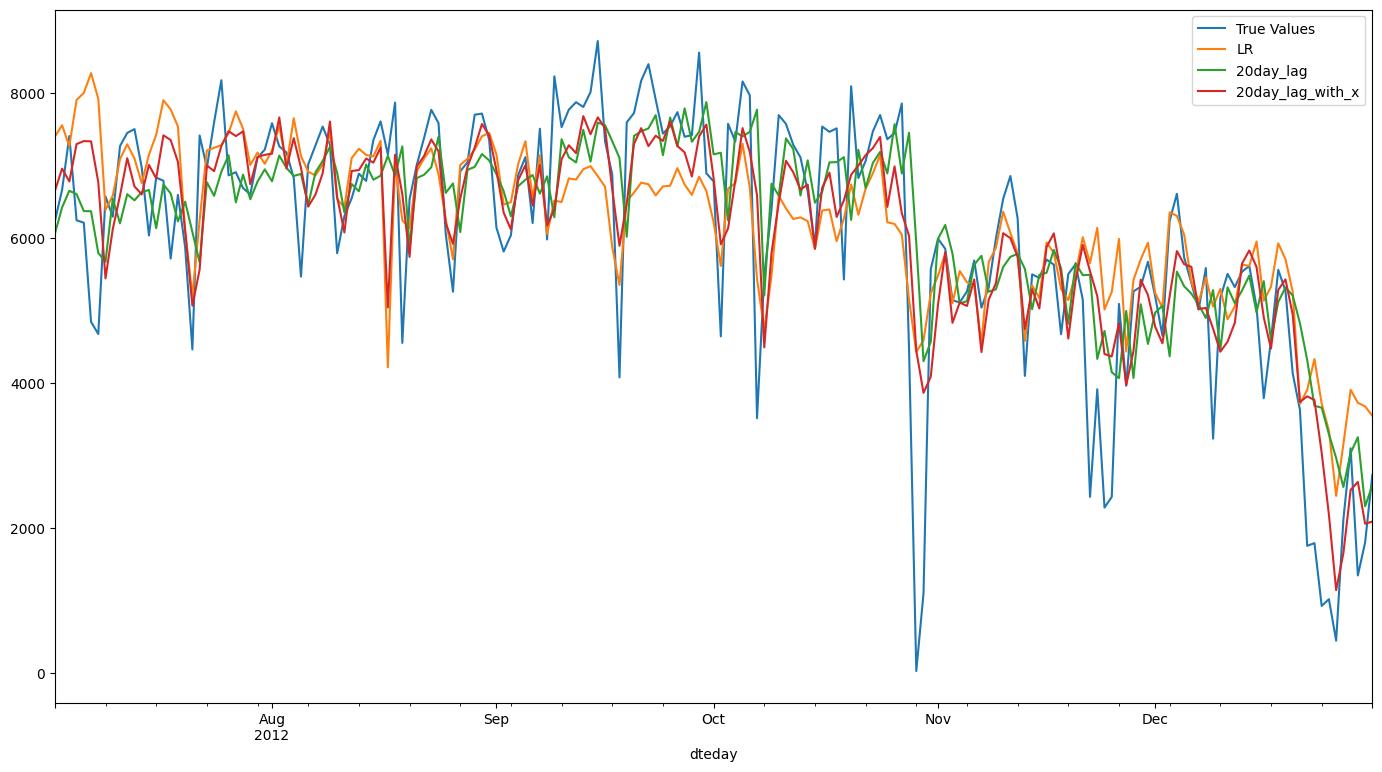

In [153]:
results.plot(figsize=(17,9))

## sktime

In [154]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [32]:
y = dY.cnt
y_train, y_test = temporal_train_test_split(y)

In [155]:
fh = ForecastingHorizon(y_train.index, is_relative=False, freq='D')
forecaster = ThetaForecaster(sp=30, )  # monthly seasonal periodicity
forecaster.fit(y_train, fh=fh)
fh = ForecastingHorizon(y_test.index, is_relative=False, freq='D')
y_pred = forecaster.predict(fh)
err('ThetaForecaster', y_pred)
errors

,MAPE,RMSE
LR,1.325638,1144.022834
20day_lag,1.690282,1144.391423
20day_lag_with_x,1.271495,964.695275
ThetaForecaster,2.105633,1995.920259


In [156]:
results['ThetaForecaster'] = y_pred

<AxesSubplot: xlabel='dteday'>

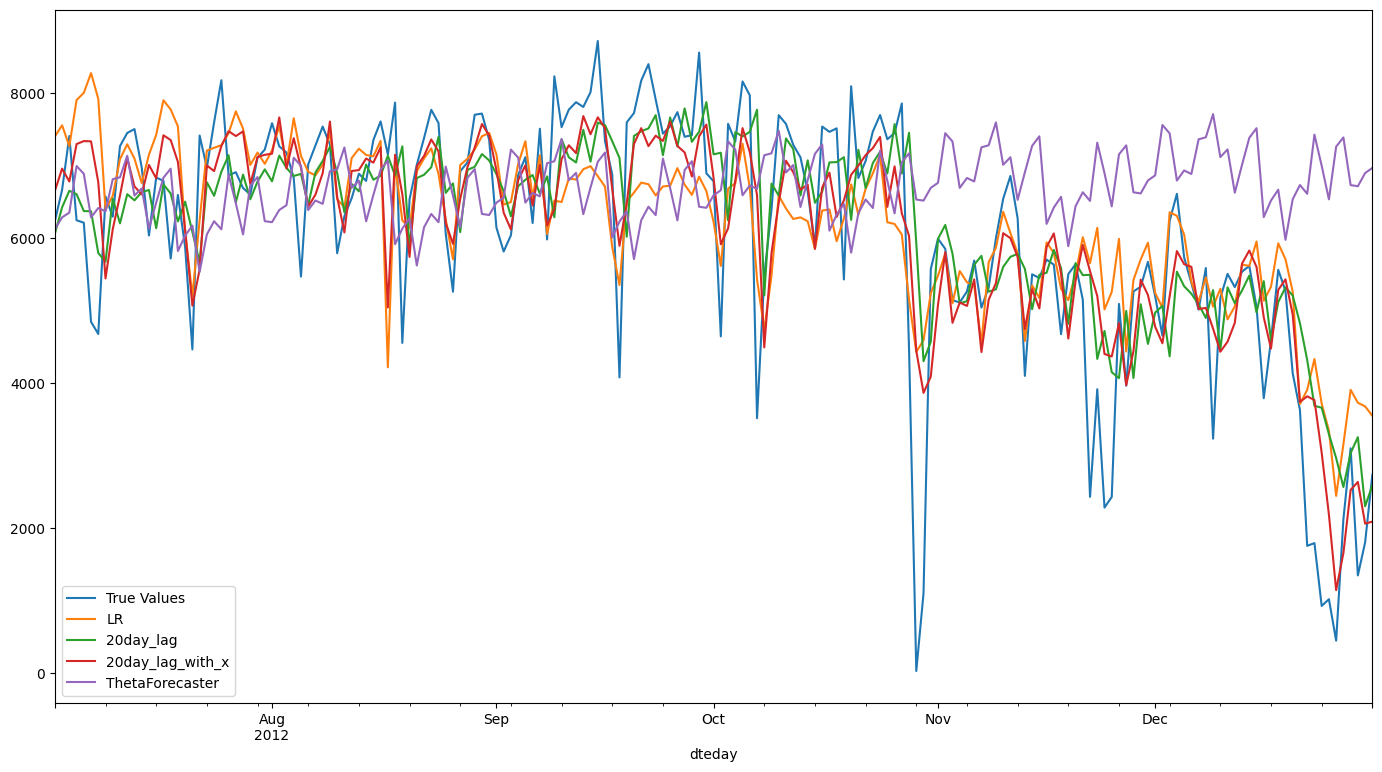

In [158]:
results.plot(figsize=(17,9))

In [41]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=30, d=1, max_p=5, max_q=5, suppress_warnings=True)  
forecaster.fit(y)  
y_pred2 = forecaster.predict(fh)

In [160]:
results['AutoARIMA'] = y_pred2

<AxesSubplot: xlabel='dteday'>

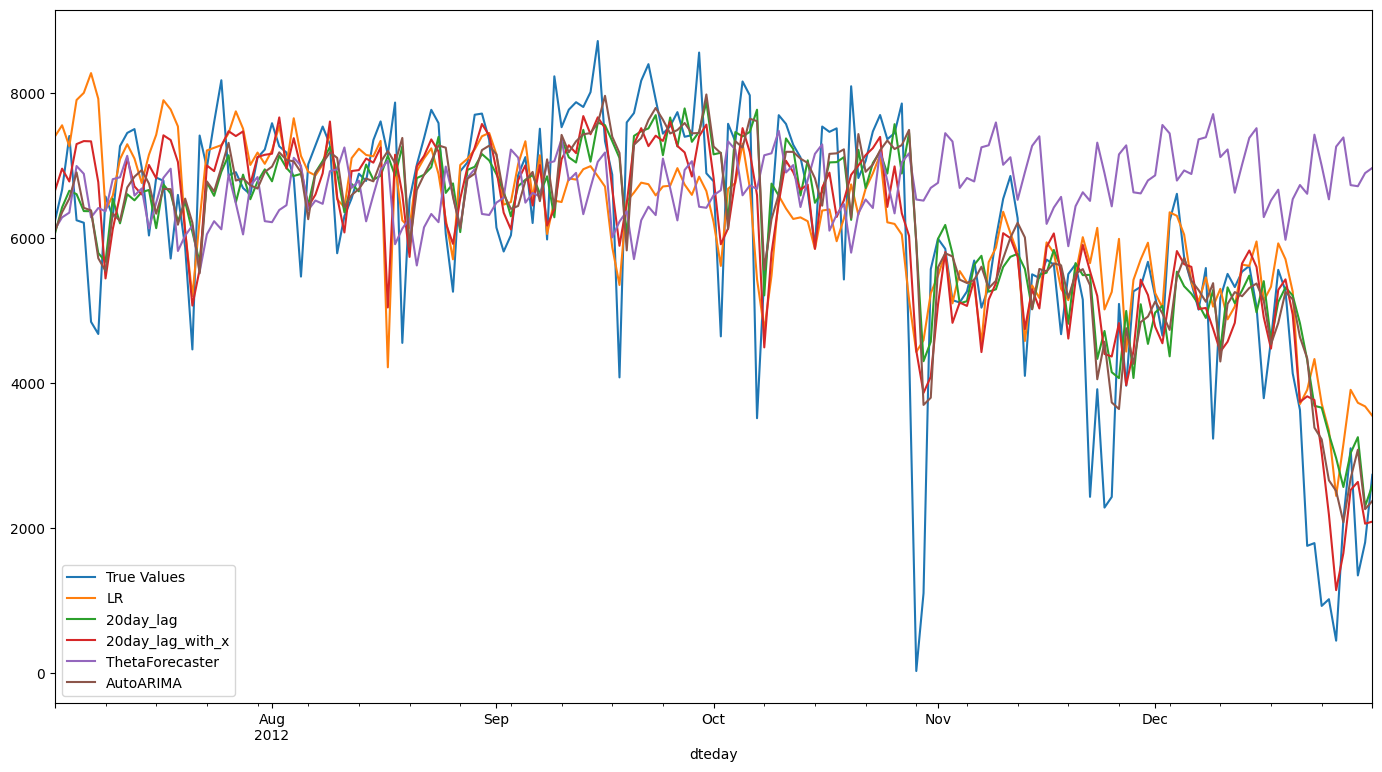

In [161]:
results.plot(figsize=(17, 9))

In [162]:
err('AutoARIMA', y_pred2)
errors

,MAPE,RMSE
LR,1.325638,1144.022834
20day_lag,1.690282,1144.391423
20day_lag_with_x,1.271495,964.695275
ThetaForecaster,2.105633,1995.920259
AutoARIMA,1.675083,1115.262966


In [166]:
err('shift', y_test.shift().fillna(6227))
errors

,MAPE,RMSE
LR,1.325638,1144.022834
20day_lag,1.690282,1144.391423
20day_lag_with_x,1.271495,964.695275
ThetaForecaster,2.105633,1995.920259
AutoARIMA,1.675083,1115.262966
shift,1.282132,1221.16568


<AxesSubplot: xlabel='dteday'>

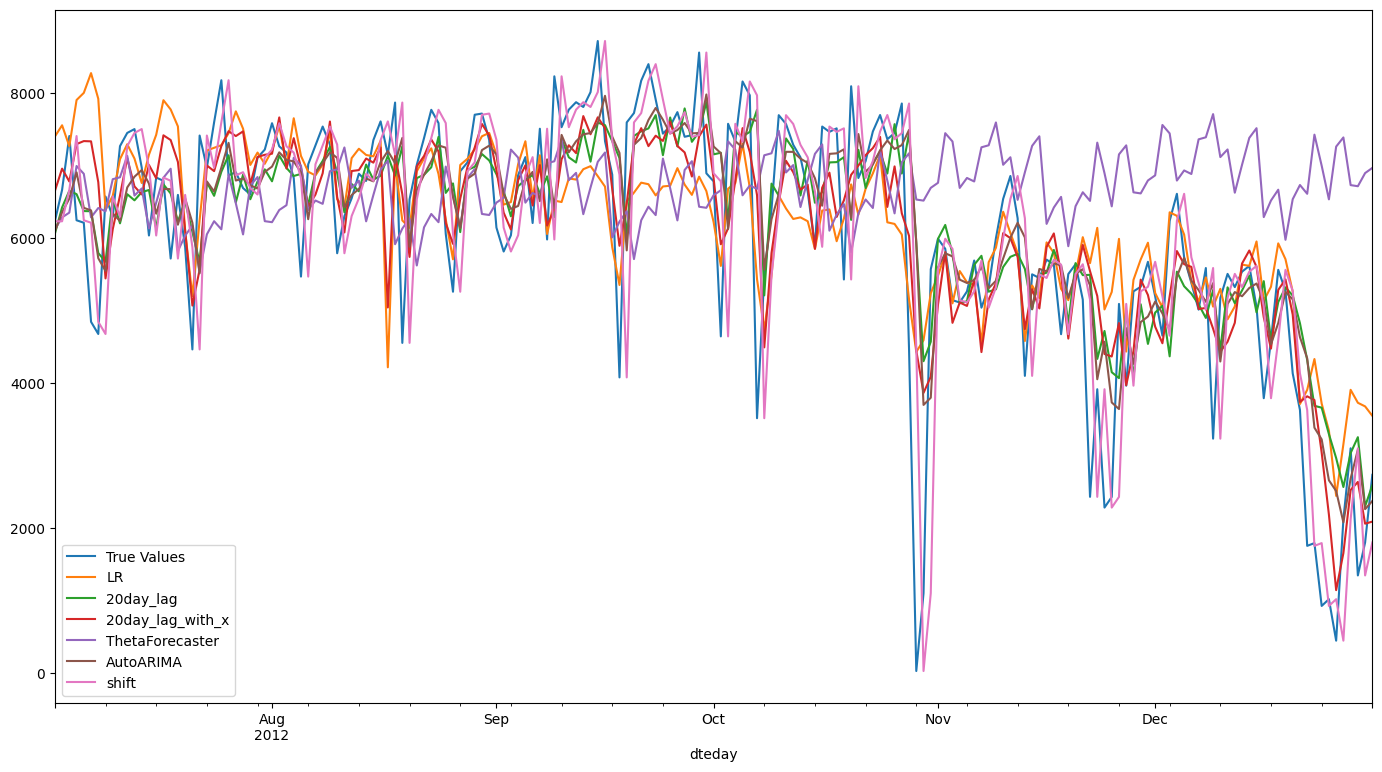

In [167]:
results['shift'] = y_test.shift().fillna(6227)
results.plot(figsize=(17,9))